# Histograms, Binnings, and Density

Un histograma simple puede ser un excelente primer paso para comprender un conjunto de datos.
Anteriormente, vimos una vista previa de la función de histograma de Matplotlib, que crea un histograma básico en una línea, una vez que se realizan las importaciones estándar normales:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

data = np.random.randn(1000)

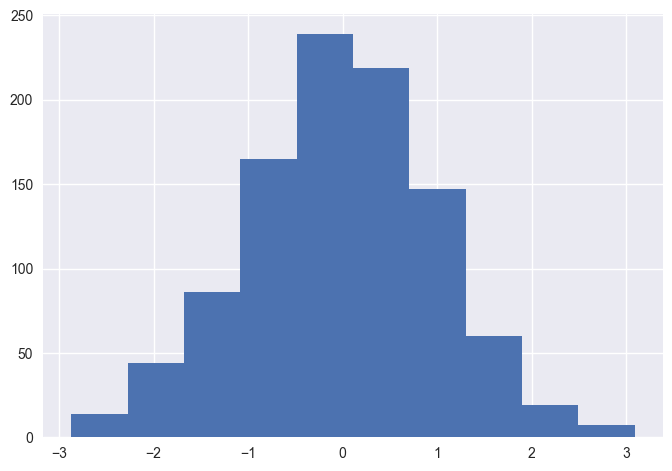

In [2]:
plt.hist(data);

La función ``hist()`` tiene muchas opciones para ajustar tanto el cálculo como la visualización;
a continuación se muestra un ejemplo de un histograma más personalizado:

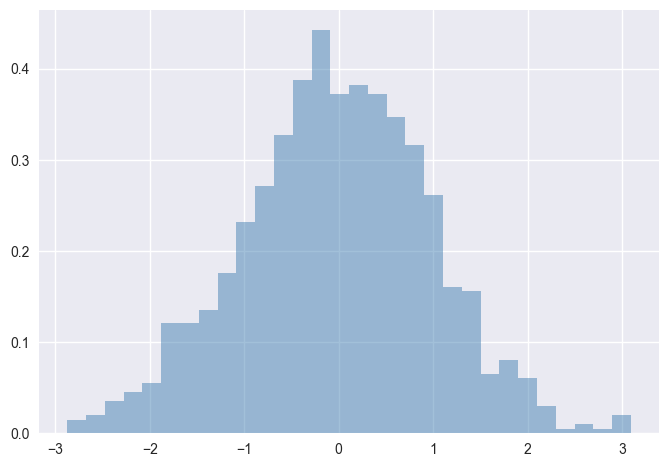

In [3]:
plt.hist(data, bins=30, density=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

La docstring de ``plt.hist`` contiene más información sobre otras opciones de personalización disponibles.
Considero que esta combinación de ``histtype='stepfilled'`` junto con algo de transparencia ``alpha`` resulta muy útil al comparar histogramas de varias distribuciones:

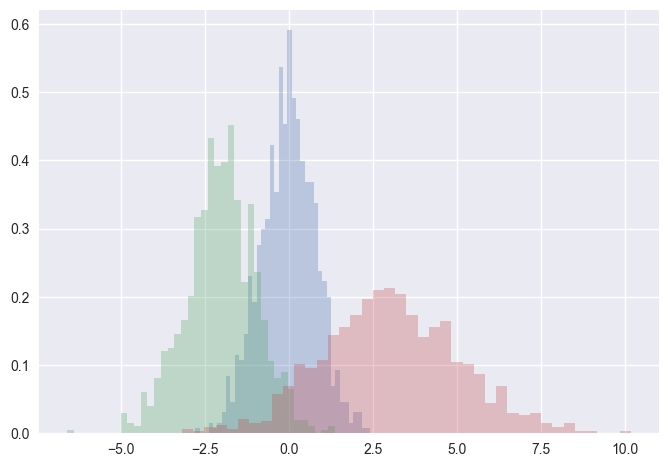

In [4]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

Si desea simplemente calcular el histograma (es decir, contar la cantidad de puntos en un contenedor determinado) y no mostrarlo, la función ``np.histogram()`` está disponible:

In [5]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 58 251 458 207  26]


## Two-Dimensional Histograms and Binnings

Así como creamos histogramas en una dimensión dividiendo la línea numérica en intervalos, también podemos crear histogramas en dos dimensiones dividiendo los puntos entre intervalos bidimensionales.
Aquí veremos brevemente varias formas de hacer esto.
Comenzaremos definiendo algunos datos: una matriz ``x`` e ``y`` extraída de una distribución gaussiana multivariada:

In [6]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

### ``plt.hist2d``: Two-dimensional histogram

Una forma sencilla de trazar un histograma bidimensional es utilizar la función ``plt.hist2d`` de Matplotlib:

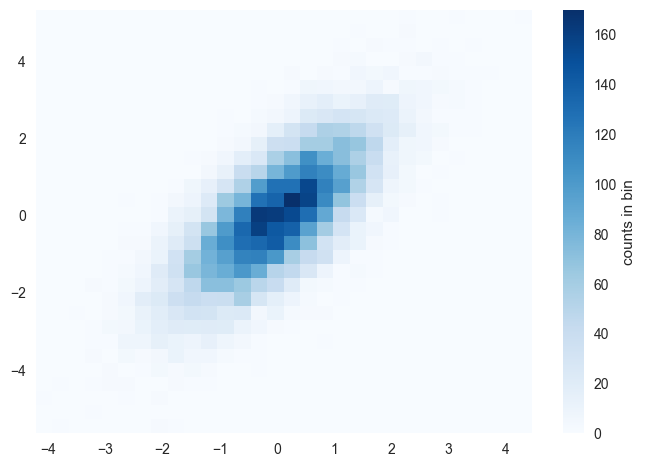

In [7]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

Al igual que con ``plt.hist``, ``plt.hist2d`` tiene una serie de opciones adicionales para ajustar el gráfico y el binning, que se describen de forma clara en la cadena de documentación de la función.
Además, al igual que ``plt.hist`` tiene una contraparte en ``np.histogram``, ``plt.hist2d`` tiene una contraparte en ``np.histogram2d``, que se puede utilizar de la siguiente manera:

In [8]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

Para la generalización de esta clasificación del histograma en dimensiones superiores a dos, consulte la función ``np.histogramdd``.

### ``plt.hexbin``: Hexagonal binnings

El histograma bidimensional crea una teselación de cuadrados a lo largo de los ejes.
Otra forma natural para dicha teselación es el hexágono regular.
Para este propósito, Matplotlib proporciona la rutina ``plt.hexbin``, que representa un conjunto de datos bidimensionales agrupados dentro de una cuadrícula de hexágonos:

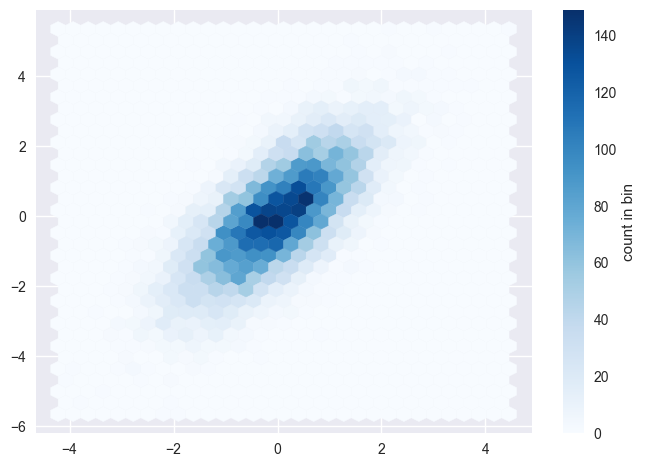

In [9]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

``plt.hexbin`` tiene varias opciones interesantes, incluida la capacidad de especificar pesos para cada punto y cambiar la salida en cada contenedor a cualquier agregado NumPy (media de pesos, desviación estándar de pesos, etc.).

### Kernel density estimation

Otro método común para evaluar densidades en múltiples dimensiones es la *estimación de densidad de núcleo* (KDE).
Se puede pensar en KDE como una forma de "difuminar" los puntos en el espacio y sumar el resultado para obtener una función uniforme.
Existe una implementación de KDE extremadamente rápida y simple en el paquete ``scipy.stats``.
A continuación se muestra un ejemplo rápido del uso de KDE con estos datos:

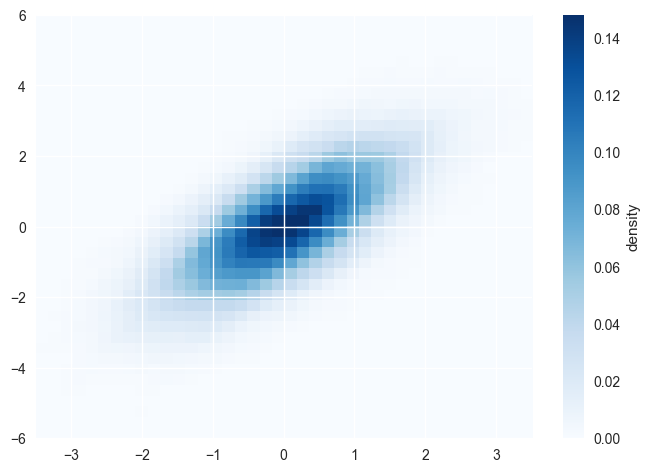

In [10]:
from scipy.stats import gaussian_kde

# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")

KDE tiene una longitud de suavizado que hace que el control se desplace de manera efectiva entre detalle y suavidad (un ejemplo del omnipresente equilibrio entre sesgo y varianza).
La ​​literatura sobre la elección de una longitud de suavizado adecuada es amplia: ``gaussian_kde`` utiliza una regla empírica para intentar encontrar una longitud de suavizado casi óptima para los datos de entrada.

Hay otras implementaciones de KDE disponibles dentro del ecosistema SciPy, cada una con sus propias fortalezas y debilidades; consulte, por ejemplo, ``sklearn.neighbors.KernelDensity`` y ``statsmodels.nonparametric.kernel_density.KDEMultivariate``.